In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')
#df_test['Loan Status'] = 0

- cross validation 
- plots 


In [3]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
ID                              67463 non-null int64
Loan Amount                     67463 non-null int64
Funded Amount                   67463 non-null int64
Funded Amount Investor          67463 non-null float64
Term                            67463 non-null int64
Batch Enrolled                  67463 non-null object
Interest Rate                   67463 non-null float64
Grade                           67463 non-null object
Sub Grade                       67463 non-null object
Employment Duration             67463 non-null object
Home Ownership                  67463 non-null float64
Verification Status             67463 non-null object
Payment Plan                    67463 non-null object
Loan Title                      67463 non-null object
Debit to Income                 67463 non-null float64
Delinquency - two years         67463 non-null int64
Inquires - six months       

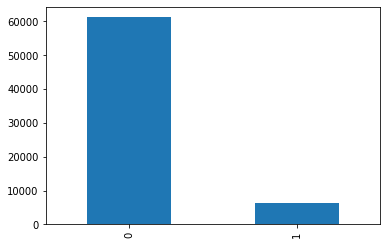

In [6]:
df['Loan Status'].value_counts().plot.bar()

In [5]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 9 columns):
Batch Enrolled         67463 non-null object
Grade                  67463 non-null object
Sub Grade              67463 non-null object
Employment Duration    67463 non-null object
Verification Status    67463 non-null object
Payment Plan           67463 non-null object
Loan Title             67463 non-null object
Initial List Status    67463 non-null object
Application Type       67463 non-null object
dtypes: object(9)
memory usage: 4.6+ MB


In [58]:
print("people who didnt return: ",df['Loan Status'].value_counts()[0]/df.shape[0] * 100)
print("people returned the loan: ",df['Loan Status'].value_counts()[1]/df.shape[0] * 100)



people who didnt return:  90.74900315728621
people returned the loan:  9.250996842713784


In [137]:
#df.groupby(['Grade'])['Loan Status'].mean()
#df['Grade'].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

In [156]:
#for the ones that paid
#print(df.groupby(['Grade'])['Loan Status'].mean())
#print(df.groupby(['Grade'])['Loan Status'].sum()/df.groupby(['Grade'])['Loan Status'].count())

### grades dont neccisarily need to have the same initial of grade as the sub grade
- banks label clients accounts based on the clients past history to detect whether the client will pay or not

In [75]:
#first five sub grades in the grad class
df[df['Grade'] == 'A']['Sub Grade'].value_counts().head()

C1    903
B4    765
B2    715
B3    676
A5    650
Name: Sub Grade, dtype: int64

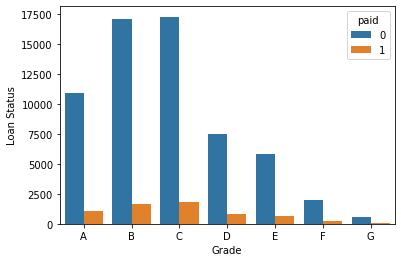

In [100]:
#print("accounts delequents categories: ",df['Accounts Delinquent'].value_counts())
#print("application types: ",df['Application Type'].value_counts())
df_paid_grade = df[df['Loan Status'] == 1].groupby(['Grade']).agg({'Loan Status': 'count'})
df_didntpay_grade = df[df['Loan Status'] == 0].groupby(['Grade']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
plt.show()

# Exporatory analysis
### Balancing the dataset
#### The plots are misleading because of the class imbalance

In [220]:
df_balanced = df[df['Loan Status'] == 0].sample(df[df['Loan Status'] == 1].shape[0])
df_balanced = pd.concat([df_balanced, df[df['Loan Status'] == 1]])
df_balanced.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
61962,3906939,15044,9867,15657.23581,59,BAT2833642,9.941306,B,D2,MORTGAGE,...,5.751409,0.420220,0,INDIVIDUAL,139,0,48,18108,2951,0
37168,36079452,30132,17803,16757.52115,59,BAT1780517,5.398200,C,D4,MORTGAGE,...,2.914939,0.334414,0,INDIVIDUAL,84,0,47,146659,2442,0
12964,35198626,19151,8907,10488.45799,59,BAT4351734,11.175232,C,D3,RENT,...,9.338576,0.415617,0,INDIVIDUAL,49,0,22,369875,19028,0
59020,6027827,30642,7592,23509.51194,59,BAT1780517,9.941728,C,D3,RENT,...,0.440126,0.499022,0,INDIVIDUAL,19,0,42,65780,27341,0
14515,3102369,20529,22142,11564.97754,58,BAT2803411,16.516473,B,E3,RENT,...,1.897745,1.034354,0,INDIVIDUAL,65,0,34,180546,26932,0


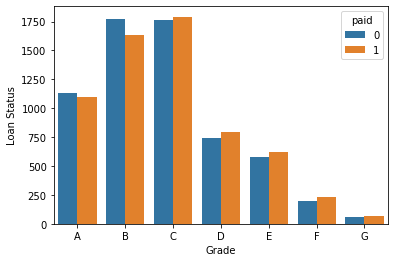

In [221]:
#print("accounts delequents categories: ",df['Accounts Delinquent'].value_counts())
#print("application types: ",df['Application Type'].value_counts())
df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Grade']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Grade']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
plt.show()

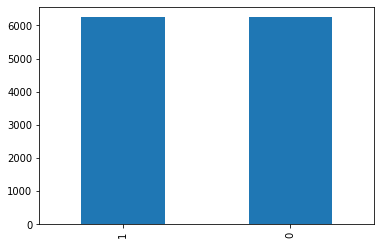

In [225]:
df_balanced['Loan Status'].value_counts().plot.bar()

In [ ]:
#grade ,sub grade
#Employment Duration
#verification status
#Initial Status

### based on value_counts and bar plots
- batch enrolled class has a variety of categories more searching needed to know what it actually is 
- Accounts Delinquent contains only one class so its useless
- payment plan seems useless
- grade class seems usable
- sub grades also seem usable
- Employment Duration is usable
- verification status is usable
- loan title has different categories but some do not seem sufficient
- Initial List Status is usable
- app type type is imbalanced so it will need some looking up

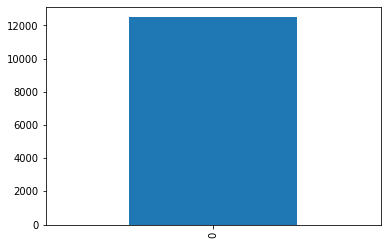

In [226]:
df_balanced['Accounts Delinquent'].value_counts().plot.bar()


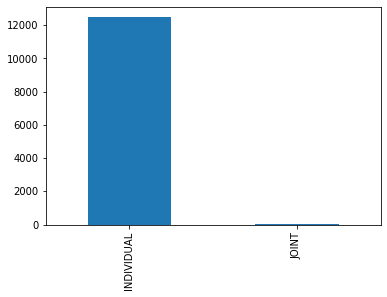

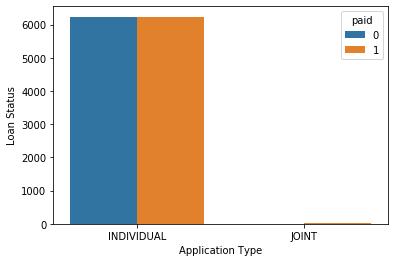

In [232]:
df_balanced['Application Type'].value_counts().plot.bar(),
#df_balanced['Application Type'].value_counts().plot.bar()

#print("accounts delequents categories: ",df['Accounts Delinquent'].value_counts())
#print("application types: ",df['Application Type'].value_counts())
df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Application Type']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Application Type']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
plt.show()

In [237]:
#df_balanced['Sub Grade'].value_counts()

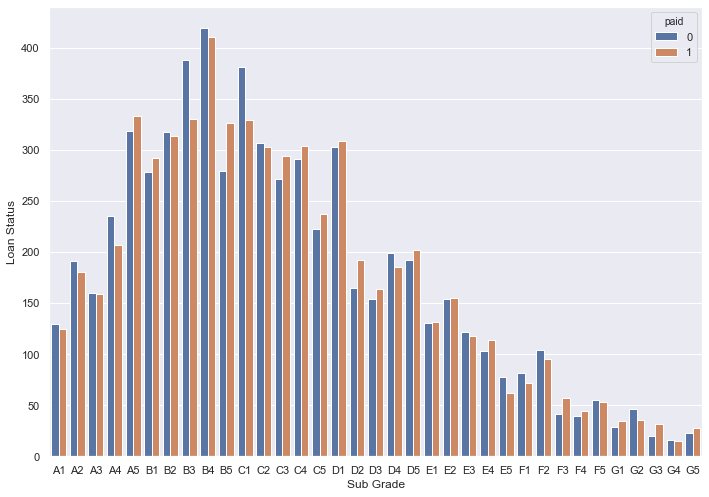

In [235]:
df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Sub Grade']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Sub Grade']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
sns.set(rc={'figure.figsize':(20,8.27)})

plt.show()

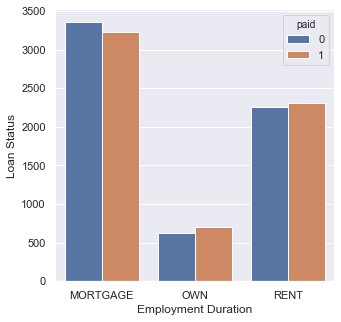

In [244]:

#verification status
#Initial Status

df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Employment Duration']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Employment Duration']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
sns.set(rc={'figure.figsize':(5,2)})

plt.show()

In [248]:
df_balanced['Verification Status'].value_counts()

Source Verified    6223
Verified           3300
Not Verified       2959
Name: Verification Status, dtype: int64

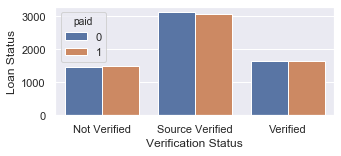

In [246]:
#Employment Duration
#verification status
#Initial Status

df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Verification Status']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Verification Status']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
sns.set(rc={'figure.figsize':(5,2)})

plt.show()

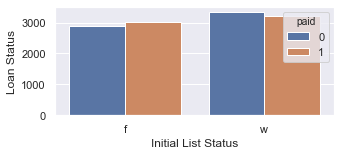

In [252]:
df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Initial List Status']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Initial List Status']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
sns.set(rc={'figure.figsize':(5,2)})

plt.show()

In [257]:
#df.shape

(67463, 35)

In [238]:
df_balanced.corr()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.000000,-0.014793,-0.000216,0.000223,-0.000598,0.001218,-0.009356,-0.008289,0.019745,0.001742,...,0.011332,-0.002555,0.000864,0.002478,0.001655,NaN,-0.004926,-0.000505,-0.002253,-0.011876
Loan Amount,-0.014793,1.000000,0.000707,-0.001076,0.004886,-0.012690,0.014798,0.007800,-0.013129,0.010392,...,0.002390,-0.007350,0.000742,0.005198,-0.009651,NaN,-0.000565,0.004645,-0.000560,-0.004550
Funded Amount,-0.000216,0.000707,1.000000,0.010688,-0.004917,0.006508,-0.005445,0.004329,0.014845,0.008612,...,-0.000918,0.010321,-0.004507,-0.009445,-0.003805,NaN,-0.002848,0.006527,0.002361,0.001449
Funded Amount Investor,0.000223,-0.001076,0.010688,1.000000,-0.004307,-0.003559,-0.004386,-0.002866,0.008075,0.007377,...,0.000784,0.003803,0.006521,0.001578,0.006275,NaN,-0.001424,-0.001142,0.007798,-0.007843
Term,-0.000598,0.004886,-0.004917,-0.004307,1.000000,-0.011617,-0.033580,0.001218,-0.014601,-0.027589,...,0.001228,0.004749,-0.005032,-0.000774,0.011083,NaN,0.006584,0.002622,-0.014242,-0.017844
Interest Rate,0.001218,-0.012690,0.006508,-0.003559,-0.011617,1.000000,0.013698,-0.011384,0.013178,0.024492,...,0.007938,0.015502,0.004184,-0.007817,-0.011655,NaN,-0.000823,-0.006636,0.019864,0.001156
Home Ownership,-0.009356,0.014798,-0.005445,-0.004386,-0.033580,0.013698,1.000000,0.027843,-0.004777,0.006426,...,0.012704,-0.006990,-0.014645,0.001457,-0.004296,NaN,0.012115,0.001203,0.015516,-0.004933
Debit to Income,-0.008289,0.007800,0.004329,-0.002866,0.001218,-0.011384,0.027843,1.000000,0.002113,-0.016262,...,-0.008130,-0.016910,-0.007181,-0.006530,0.012437,NaN,0.005211,-0.004521,-0.011848,0.000627
Delinquency - two years,0.019745,-0.013129,0.014845,0.008075,-0.014601,0.013178,-0.004777,0.002113,1.000000,0.026114,...,0.013734,0.013999,0.011629,0.008363,0.005258,NaN,0.008709,-0.017741,0.011718,0.008269
Inquires - six months,0.001742,0.010392,0.008612,0.007377,-0.027589,0.024492,0.006426,-0.016262,0.026114,1.000000,...,0.003023,0.004804,0.018149,0.004590,-0.010651,NaN,0.000852,0.002355,0.000036,0.004938


### DataPrep
- onehot encoding 
- single column encoding

In [258]:
#onehot encoding
#grade ,sub grade
#Employment Duration
#verification status
#Initial Status
def prep(df):
    #df = pd.concat([df, pd.get_dummies(df['Batch Enrolled'])], axis=1)
    #df = df.drop('Batch Enrolled' ,axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Grade'])], axis=1)
    df = df.drop('Grade', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Sub Grade'])], axis=1)
    df = df.drop('Sub Grade', axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Employment Duration'])], axis=1)
    df = df.drop('Employment Duration', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Verification Status'])], axis=1)
    df = df.drop('Verification Status', axis = 1)



    #df = pd.concat([df, pd.get_dummies(df['Payment Plan'])], axis=1)
    #df = df.drop('Payment Plan', axis = 1)

    #df = pd.concat([df, pd.get_dummies(df['Loan Title'])], axis=1)
    #df = df.drop('Loan Title', axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Initial List Status'])], axis=1)
    df = df.drop('Initial List Status', axis = 1)

    #df = pd.concat([df, pd.get_dummies(df['Application Type'])], axis=1)
    #df = df.drop('Application Type', axis = 1)
    return df

# Balanced dataset using downsampling

In [259]:
df_balanced = prep(df_balanced)
df_balanced.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Home Ownership,Payment Plan,Loan Title,...,G4,G5,MORTGAGE,OWN,RENT,Not Verified,Source Verified,Verified,f,w
61962,3906939,15044,9867,15657.23581,59,BAT2833642,9.941306,55782.43903,n,Credit card refinancing,...,0,0,1,0,0,0,1,0,0,1
37168,36079452,30132,17803,16757.52115,59,BAT1780517,5.398200,66165.94456,n,Debt consolidation,...,0,0,1,0,0,1,0,0,0,1
12964,35198626,19151,8907,10488.45799,59,BAT4351734,11.175232,70728.57900,n,Debt consolidation,...,0,0,0,0,1,1,0,0,1,0
59020,6027827,30642,7592,23509.51194,59,BAT1780517,9.941728,100315.68500,n,Credit card refinancing,...,0,0,0,0,1,1,0,0,0,1
14515,3102369,20529,22142,11564.97754,58,BAT2803411,16.516473,72647.34069,n,Debt consolidation,...,0,0,0,0,1,1,0,0,1,0


In [405]:
df_quan = df_balanced.drop(df_balanced.select_dtypes('object').columns, axis=1)
#df_quan_test = df_test.drop(df_test.select_dtypes('object').columns, axis=1)

df_quan.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,G4,G5,MORTGAGE,OWN,RENT,Not Verified,Source Verified,Verified,f,w
61962,3906939,15044,9867,15657.23581,59,9.941306,55782.43903,25.184239,1,0,...,0,0,1,0,0,0,1,0,0,1
37168,36079452,30132,17803,16757.52115,59,5.398200,66165.94456,21.126360,0,0,...,0,0,1,0,0,1,0,0,0,1
12964,35198626,19151,8907,10488.45799,59,11.175232,70728.57900,35.167893,0,0,...,0,0,0,0,1,1,0,0,1,0
59020,6027827,30642,7592,23509.51194,59,9.941728,100315.68500,18.856882,0,0,...,0,0,0,0,1,1,0,0,0,1
14515,3102369,20529,22142,11564.97754,58,16.516473,72647.34069,24.207318,0,0,...,0,0,0,0,1,1,0,0,1,0


In [406]:
from sklearn.model_selection import train_test_split

#X_quan = df_quan.iloc[:,0:25]
#quan not used anymore
X_quan = df_quan.loc[:, df_quan.columns != 'Loan Status']
Y_quan = df_quan['Loan Status']

X_quan.drop('ID',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
    X_quan, Y_quan, test_size=0.33, random_state=42)

#X_quan_test = df_quan_test.iloc[:,0:25]
#Y_quan_test = df_quan_test['Loan Status']

### KNN

In [416]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [417]:
#accuracy 
Y_quan_predict = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_quan_predict))
log_loss(y_test, Y_quan_predict)

Accuracy: 0.48810679611650487


17.680372763522904

### SVM

In [409]:
from sklearn import svm
clf = svm.SVC(gamma = 'auto')
clf.fit(X_train.iloc[0:1000], y_train.iloc[0:1000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [410]:
Y_quan_predict = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_quan_predict))
log_loss(y_test, Y_quan_predict)

Accuracy: 0.48810679611650487


17.571590116491866

### naive bayes

In [411]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_quan_predict = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, Y_quan_predict)

Accuracy: 0.49854368932038834


17.31986477280016

### logistic regression

In [412]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
Y_quan_predict = clf.predict(X_test)
#gnb.fit(X_quan_train, Y_quan_train)

print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, Y_quan_predict)


Accuracy: 0.49199029126213595


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17.546284872238527

In [413]:
y_test.shape

(4120,)

### MLP  sklearn

In [414]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1,hidden_layer_sizes = (512,32),activation = "relu",solver = "sgd" ,max_iter=300).fit(X_train, y_train)
Y_quan_predict = clf.predict(X_test)



#clf.predict(X_test[:5, :])
#clf.score(X_test, y_test)


In [415]:
#log_loss(y_test,model/''.predict(X_test).reshape(y_test.shape,))
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, Y_quan_predict)

Accuracy: 0.508495145631068


16.975976650215774

### keras tensorflow

In [309]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [326]:
#tf.convert_to_tensor(X_train.values)
#normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(numeric_features)
#np.array(y_train)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [402]:
# Create the model
model = Sequential()
model.add(Dense(512, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

# Configure the model and start training
#optimzer sgd, adam
#binary cross enropy is logloss
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Train on 6689 samples, validate on 1673 samples
Epoch 1/10
6689/6689 [==============================] - 1s 145us/sample - loss: 7.7597 - acc: 0.4969 - val_loss: 7.8554 - val_acc: 0.4907
Epoch 2/10
6689/6689 [==============================] - 0s 26us/sample - loss: 7.7597 - acc: 0.4969 - val_loss: 7.8554 - val_acc: 0.4907
Epoch 3/10
6689/6689 [==============================] - 0s 26us/sample - loss: 7.7597 - acc: 0.4969 - val_loss: 7.8554 - val_acc: 0.4907
Epoch 4/10
6689/6689 [==============================] - 0s 39us/sample - loss: 7.7597 - acc: 0.4969 - val_loss: 7.8554 - val_acc: 0.4907
Epoch 5/10
6689/6689 [==============================] - 0s 33us/sample - loss: 7.7597 - acc: 0.4969 - val_loss: 7.8554 - val_acc: 0.4907
Epoch 6/10
6689/6689 [==============================] - 0s 17us/sample - loss: 7.7597 - acc: 0.4969 - val_loss: 7.8554 - val_acc: 0.4907
Epoch 7/10
6689/6689 [==============================] - 0s 22us/sample - loss: 7.7597 - acc: 0.4969 - val_loss: 7.8554 - val_acc:

In [404]:
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test).astype(int)))
log_loss(y_test,model.predict(X_test).astype(int))


Accuracy: 0.5087378640776699


16.967593063907575

# Original unblanaced Dataset 

In [7]:
df = prep(df)
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,pay off bills,payoff,personal,refi,relief,vacation,f,w,INDIVIDUAL,JOINT
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,...,0,0,0,0,0,0,0,1,1,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,...,0,0,0,0,0,0,0,1,1,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,...,0,0,0,0,0,0,0,1,1,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,...,0,0,0,0,0,0,0,1,1,0


In [24]:
df_quan = df.drop(df.select_dtypes('object').columns, axis=1)
#df_quan_test = df_test.drop(df_test.select_dtypes('object').columns, axis=1)

df_quan

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,...,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,...,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,...,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,...,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,...,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,9.408858,83961.15003,28.105127,1,0,...,0.023478,564.614852,0.865230,0,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,9.972104,65491.12817,17.694279,0,0,...,0.027095,2.015494,1.403368,0,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,19.650943,34813.96985,10.295774,0,0,...,0.028212,5.673092,1.607093,0,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,13.169095,96938.83564,7.614624,0,0,...,0.074508,1.157454,0.207608,0,73,0,61,361339,39075,0


In [9]:
from sklearn.model_selection import train_test_split

#X_quan = df_quan.iloc[:,0:25]
#quan not used anymore
X_quan = df.loc[:, df.columns != 'Loan Status']
Y_quan = df_quan['Loan Status']


X_train, X_test, y_train, y_test = train_test_split(
    X_quan, Y_quan, test_size=0.33, random_state=42)

#X_quan_test = df_quan_test.iloc[:,0:25]
#Y_quan_test = df_quan_test['Loan Status']

### KNN

In [10]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
#accuracy 
y_quan_predict = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_quan_predict))


Accuracy: 0.8884696581772448


### SVM

In [12]:
from sklearn import svm
clf = svm.SVC(gamma = 'auto')
clf.fit(X_train.iloc[0:1000], y_train.iloc[0:1000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
Y_quan_predict = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_quan_predict))


Accuracy: 0.8884696581772448


### naive bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_quan_predict = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))


Accuracy: 0.9072452050487356


### logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
Y_quan_predict = clf.predict(X_test)
#gnb.fit(X_quan_train, Y_quan_train)

print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9094461662848673


### keras tensorflow

In [16]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [17]:
# Create the model
model = Sequential()
model.add(Dense(512, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 36160 samples, validate on 9040 samples
Epoch 1/10
36160/36160 [==============================] - 2s 42us/sample - loss: 329960.1549 - acc: 0.8249 - val_loss: 75093.8432 - val_acc: 0.9087
Epoch 2/10
36160/36160 [==============================] - 1s 39us/sample - loss: 47907.8635 - acc: 0.8307 - val_loss: 14663.8960 - val_acc: 0.9034
Epoch 3/10
36160/36160 [==============================] - 1s 40us/sample - loss: 46952.8103 - acc: 0.8246 - val_loss: 31655.4770 - val_acc: 0.1101
Epoch 4/10
36160/36160 [==============================] - 1s 38us/sample - loss: 42766.2941 - acc: 0.8212 - val_loss: 91873.0848 - val_acc: 0.9091
Epoch 5/10
36160/36160 [==============================] - 1s 37us/sample - loss: 55280.1489 - acc: 0.8314 - val_loss: 9685.4646 - val_acc: 0.9091
Epoch 6/10
36160/36160 [==============================] - 1s 40us/sample - loss: 16537.1529 - acc:

In [ ]:
'''
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in Rest Object Columns.
loan_train['Batch Enrolled']= label_encoder.fit_transform(loan_train['Batch Enrolled'])
 
loan_train['Batch Enrolled'].unique()
'''